In [84]:
import numpy as np 
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
from packing import Individual, Population, Circle, Rect

import pickle

random.seed(0)
np.random.seed(0)

In [85]:
def load_data(filename):
    path = Path("../data") / str("r" + filename + ".csv")
    data = pd.read_csv(path, header=None)
    data.columns = ["width", "height", "value"]
    return data

In [86]:
r800 = load_data("800")
r800

,width,height,value
0,250,120,100
1,320,160,500
2,250,160,600
3,150,120,40
4,400,30,400


## definition of an individual

an one individual is a set of rectangles that are properly fit inside a circle of given radius. These rectangles should not overlap and should be fully contained in the circle

## Evaluations of hyperparameter impact
performed on dataset 800


In [87]:
df = load_data("800")

In [88]:
import pandas as pd
experiment_filepath = Path("experiments")

def load_summary_experiment(experiment_name):
    avg_scores = pd.read_csv(experiment_filepath / experiment_name / "avg_individual_scores.csv")
    best_scores = pd.read_csv(experiment_filepath / experiment_name / "best_individual_scores.csv")
    times = pd.read_csv(experiment_filepath / experiment_name / "times.csv")
    
    avg_scores.columns = ["index", "exp1", "exp2", "exp3"]
    best_scores.columns = ["index", "exp1", "exp2", "exp3"]
    times.columns = ["index", "exp1", "exp2", "exp3"]
        
    avg_scores.drop("index", axis=1, inplace=True)
    best_scores.drop("index", axis = 1, inplace = True)
    times.drop("index", axis=1, inplace = True)
    
    
    return best_scores, avg_scores, times

### Number of individuals


Text(0.5, 1.0, '10 individuals')

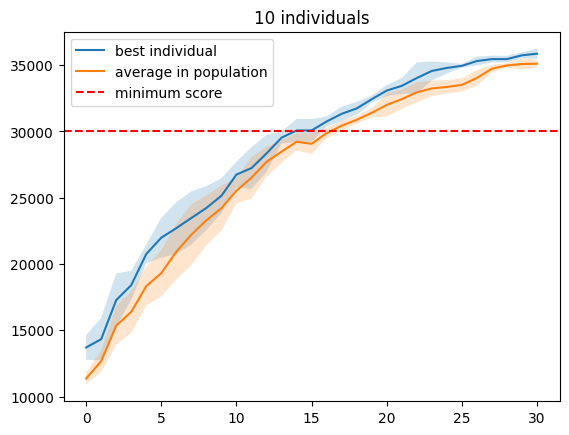

In [89]:
best_scores_10, avg_scores_10, times_10 = load_summary_experiment("800_10_individuals")

plt.plot(best_scores_10.index, best_scores_10.mean(axis=1), label="best individual")
plt.plot(avg_scores_10.index, avg_scores_10.mean(axis=1), label="average in population")

plt.fill_between(best_scores_10.index, y1 = best_scores_10.mean(axis = 1) - best_scores_10.std(axis = 1), y2 = best_scores_10.mean(axis = 1) + best_scores_10.std(axis = 1), alpha = 0.2)
plt.fill_between(avg_scores_10.index, y1 = avg_scores_10.mean(axis = 1) - avg_scores_10.std(axis = 1), y2 = avg_scores_10.mean(axis = 1) + avg_scores_10.std(axis = 1), alpha = 0.2)


plt.axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

plt.legend()
plt.title("10 individuals")

Text(0.5, 1.0, '50 individuals')

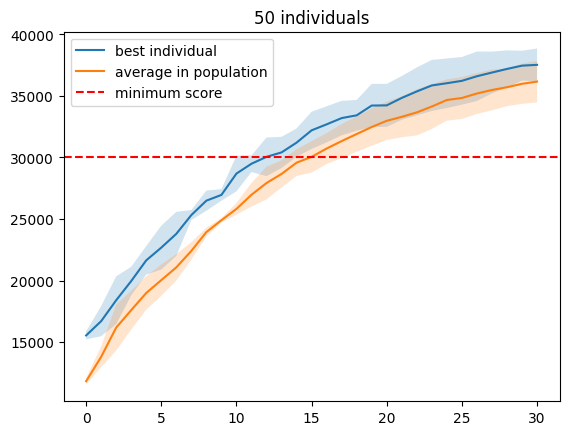

In [90]:
best_scores_50, avg_scores_50, times_50 = load_summary_experiment("800_50_individuals")

plt.plot(best_scores_50.index, best_scores_50.mean(axis=1), label="best individual")
plt.plot(avg_scores_50.index, avg_scores_50.mean(axis=1), label="average in population")

plt.fill_between(best_scores_50.index, y1 = best_scores_50.mean(axis = 1) - best_scores_50.std(axis = 1), y2 = best_scores_50.mean(axis = 1) + best_scores_50.std(axis = 1), alpha = 0.2)
plt.fill_between(avg_scores_50.index, y1 = avg_scores_50.mean(axis = 1) - avg_scores_50.std(axis = 1), y2 = avg_scores_50.mean(axis = 1) + avg_scores_50.std(axis = 1), alpha = 0.2)


plt.axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

plt.legend()
plt.title("50 individuals")

Text(0.5, 1.0, '100 individuals')

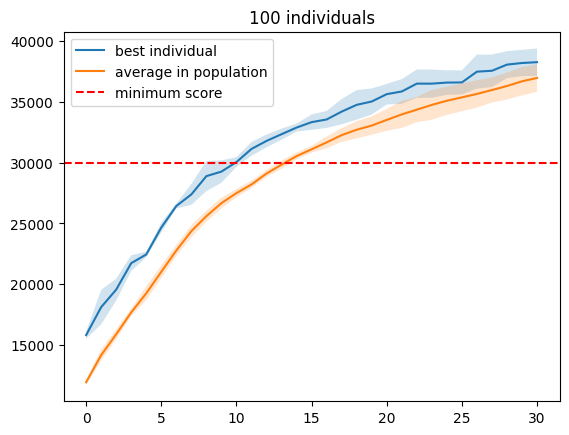

In [91]:
best_scores_100, avg_scores_100, times_100 = load_summary_experiment("800_100_individuals")

plt.plot(best_scores_100.index, best_scores_100.mean(axis=1), label="best individual")
plt.plot(avg_scores_100.index, avg_scores_100.mean(axis=1), label="average in population")

plt.fill_between(best_scores_100.index, y1 = best_scores_100.mean(axis = 1) - best_scores_100.std(axis = 1), y2 = best_scores_100.mean(axis = 1) + best_scores_100.std(axis = 1), alpha = 0.2)
plt.fill_between(avg_scores_100.index, y1 = avg_scores_100.mean(axis = 1) - avg_scores_100.std(axis = 1), y2 = avg_scores_100.mean(axis = 1) + avg_scores_100.std(axis = 1), alpha = 0.2)


plt.axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

plt.legend()
plt.title("100 individuals")

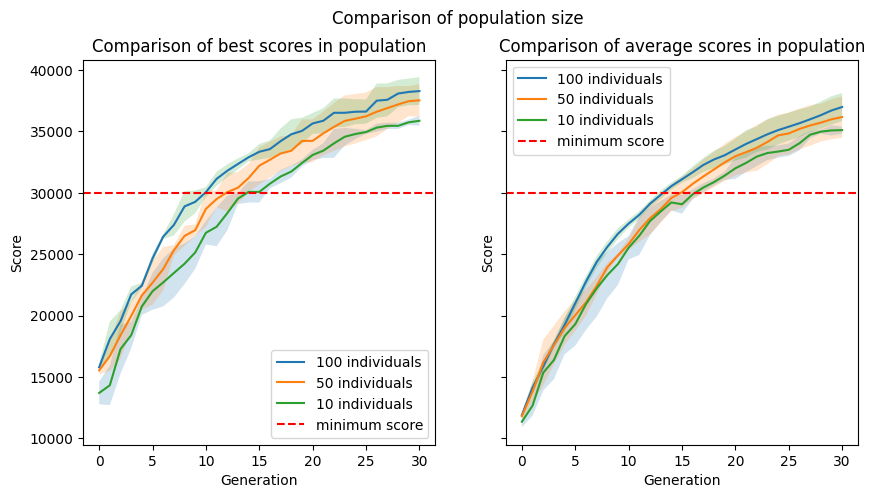

In [132]:
# comparison of best scores over individuals

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].plot(best_scores_100.index, best_scores_100.mean(axis=1), label="100 individuals")
axs[0].plot(best_scores_50.index, best_scores_50.mean(axis=1), label="50 individuals")
axs[0].plot(best_scores_10.index, best_scores_10.mean(axis=1), label="10 individuals")

axs[0].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[0].fill_between(best_scores_10.index, y1 = best_scores_10.mean(axis = 1) - best_scores_10.std(axis = 1), y2 = best_scores_10.mean(axis = 1) + best_scores_10.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_50.index, y1 = best_scores_50.mean(axis = 1) - best_scores_50.std(axis = 1), y2 = best_scores_50.mean(axis = 1) + best_scores_50.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_100.index, y1 = best_scores_100.mean(axis = 1) - best_scores_100.std(axis = 1), y2 = best_scores_100.mean(axis = 1) + best_scores_100.std(axis = 1), alpha = 0.2)

axs[0].legend()



axs[0].set_title("Comparison of best scores in population")
axs[0].set_xlabel("Generation")
axs[0].set_ylabel("Score")




axs[1].plot(avg_scores_100.index, avg_scores_100.mean(axis=1), label="100 individuals")
axs[1].plot(avg_scores_50.index, avg_scores_50.mean(axis=1), label="50 individuals")
axs[1].plot(avg_scores_10.index, avg_scores_10.mean(axis=1), label="10 individuals")

axs[1].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[1].fill_between(avg_scores_10.index, y1 = avg_scores_10.mean(axis = 1) - avg_scores_10.std(axis = 1), y2 = avg_scores_10.mean(axis = 1) + avg_scores_10.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_50.index, y1 = avg_scores_50.mean(axis = 1) - avg_scores_50.std(axis = 1), y2 = avg_scores_50.mean(axis = 1) + avg_scores_50.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_100.index, y1 = avg_scores_100.mean(axis = 1) - avg_scores_100.std(axis = 1), y2 = avg_scores_100.mean(axis = 1) + avg_scores_100.std(axis = 1), alpha = 0.2)

axs[1].legend()


axs[1].set_ylim(axs[0].get_ylim())

axs[1].set_title("Comparison of average scores in population")
axs[1].set_xlabel("Generation")
axs[1].set_ylabel("Score")

fig.suptitle("Comparison of population size")

plt.savefig("../img/hyperparameters/pop_size.png")

In [133]:
print("Rozmiar populacji & średni wynik & najlepszy wynik \\\\\\hline")
print("10 osobników & " + "{:.0f}".format(avg_scores_10.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_10.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_10.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_10.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("50 osobników & " + "{:.0f}".format(avg_scores_50.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_50.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_50.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_50.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("100 osobników & " + "{:.0f}".format(avg_scores_100.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_100.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_100.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_100.std(axis=1).iloc[-1]) + " \\\\ \\hline")

Rozmiar populacji & średni wynik & najlepszy wynik \\\hline
10 osobników & 35105±285 & 35860±393 \\ \hline
50 osobników & 36165±1690 & 37527±1329 \\ \hline
100 osobników & 36983±1140 & 38280±1129 \\ \hline


In [127]:
best_scores_replace, avg_scores_replace, times = load_summary_experiment("800_replace")
best_scores_move, avg_scores_move, times = load_summary_experiment("800_move")
best_scores_move_remove, avg_scores_move_remove, times = load_summary_experiment("800_move_remove")
best_scores_slide, avg_scores_slide, times = load_summary_experiment("800_100_individuals")


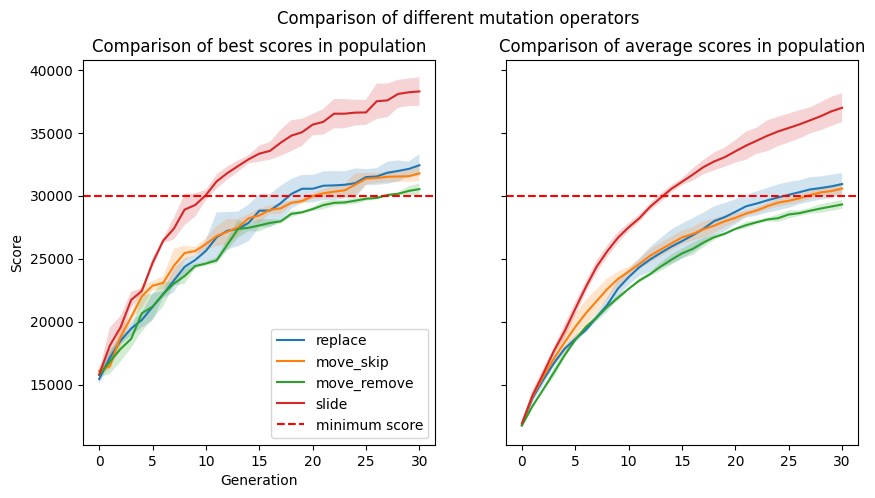

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


axs[0].plot(best_scores_replace.index, best_scores_replace.mean(axis=1), label="replace")
axs[0].plot(best_scores_move.index, best_scores_move.mean(axis=1), label="move_skip")
axs[0].plot(best_scores_move_remove.index, best_scores_move_remove.mean(axis=1), label="move_remove")
axs[0].plot(best_scores_slide.index, best_scores_slide.mean(axis=1), label="slide")

axs[0].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[0].fill_between(best_scores_replace.index, y1 = best_scores_replace.mean(axis = 1) - best_scores_replace.std(axis = 1), y2 = best_scores_replace.mean(axis = 1) + best_scores_replace.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_move.index, y1 = best_scores_move.mean(axis = 1) - best_scores_move.std(axis = 1), y2 = best_scores_move.mean(axis = 1) + best_scores_move.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_move_remove.index, y1 = best_scores_move_remove.mean(axis = 1) - best_scores_move_remove.std(axis = 1), y2 = best_scores_move_remove.mean(axis = 1) + best_scores_move_remove.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_slide.index, y1 = best_scores_slide.mean(axis = 1) - best_scores_slide.std(axis = 1), y2 = best_scores_slide.mean(axis = 1) + best_scores_slide.std(axis = 1), alpha = 0.2)


axs[0].set_title("Comparison of best scores in population")

axs[0].set_xlabel("Generation")
axs[0].set_ylabel("Score")

axs[1].plot(avg_scores_replace.index, avg_scores_replace.mean(axis=1), label="replace")
axs[1].plot(avg_scores_move.index, avg_scores_move.mean(axis=1), label="move_skip")
axs[1].plot(avg_scores_move_remove.index, avg_scores_move_remove.mean(axis=1), label="move_remove")
axs[1].plot(avg_scores_slide.index, avg_scores_slide.mean(axis=1), label="slide")

axs[1].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[1].fill_between(avg_scores_replace.index, y1 = avg_scores_replace.mean(axis = 1) - avg_scores_replace.std(axis = 1), y2 = avg_scores_replace.mean(axis = 1) + avg_scores_replace.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_move.index, y1 = avg_scores_move.mean(axis = 1) - avg_scores_move.std(axis = 1), y2 = avg_scores_move.mean(axis = 1) + avg_scores_move.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_move_remove.index, y1 = avg_scores_move_remove.mean(axis = 1) - avg_scores_move_remove.std(axis = 1), y2 = avg_scores_move_remove.mean(axis = 1) + avg_scores_move_remove.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_slide.index, y1 = avg_scores_slide.mean(axis = 1) - avg_scores_slide.std(axis = 1), y2 = avg_scores_slide.mean(axis = 1) + avg_scores_slide.std(axis = 1), alpha = 0.2)

axs[1].set_title("Comparison of average scores in population")


axs[0].legend()

fig.suptitle("Comparison of different mutation operators")

plt.savefig("../img/hyperparameters/mutations.png")

In [130]:
print("rodzaj mutacji & średni wynik & najlepszy wynik \\\\\\hline")
print("replace & " + "{:.0f}".format(avg_scores_replace.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_replace.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_replace.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_replace.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("move+skip & " + "{:.0f}".format(avg_scores_move.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_move.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_move.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_move.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("move+remove & " + "{:.0f}".format(avg_scores_move_remove.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_move_remove.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_move_remove.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_move_remove.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("slide & " + "{:.0f}".format(avg_scores_slide.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_slide.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_slide.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_slide.std(axis=1).iloc[-1]) + " \\\\ \\hline")

rodzaj mutacji & średni wynik & najlepszy wynik \\\hline
replace & 30923±863 & 32420±871 \\ \hline
move+skip & 30571±496 & 31780±642 \\ \hline
move+remove & 29308±352 & 30527±450 \\ \hline
slide & 36983±1140 & 38280±1129 \\ \hline


In [82]:
import pickle

experiment_filepath = Path("experiments")

def load_population(experiment_name, number = 1):
    with open(experiment_filepath / experiment_name / str(str(number) + ".pkl"), "rb") as f:
        return pickle.load(f)[3]

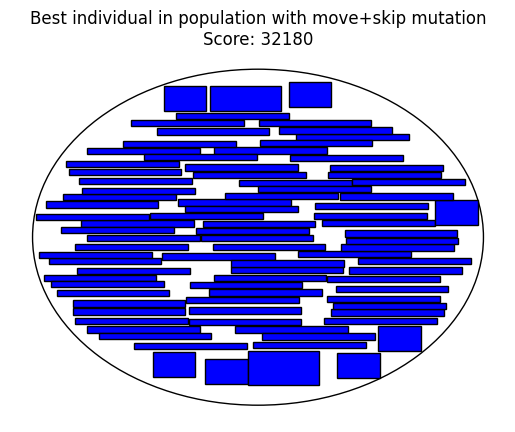

In [100]:
pop_move = load_population("800_move", 2)
pop_move.best_individual().plot()

plt.title("Best individual in population with move+skip mutation\nScore: " + str(pop_move.best_individual().score()))   

plt.savefig("../img/hyperparameters/best_individual_move_skip.png")

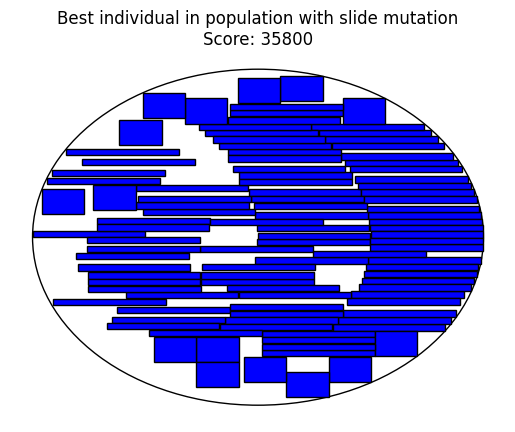

In [101]:
pop_move = load_population("800_10_individuals", 2)
pop_move.best_individual().plot()

plt.title("Best individual in population with slide mutation\nScore: " + str(pop_move.best_individual().score()))   

plt.savefig("../img/hyperparameters/best_individual_slide.png")

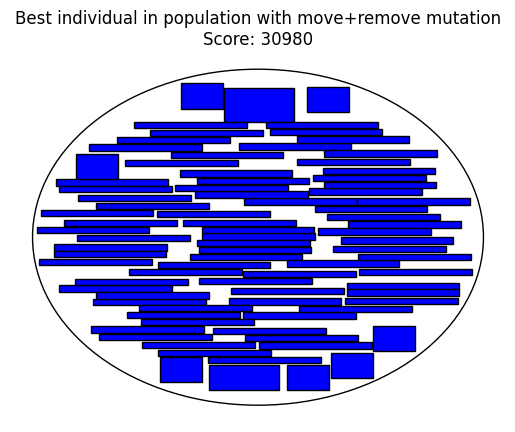

In [103]:
pop_move = load_population("800_move_remove", 2)
pop_move.best_individual().plot()

plt.title("Best individual in population with move+remove mutation\nScore: " + str(pop_move.best_individual().score()))   

plt.savefig("../img/hyperparameters/best_individual_move_remove.png")

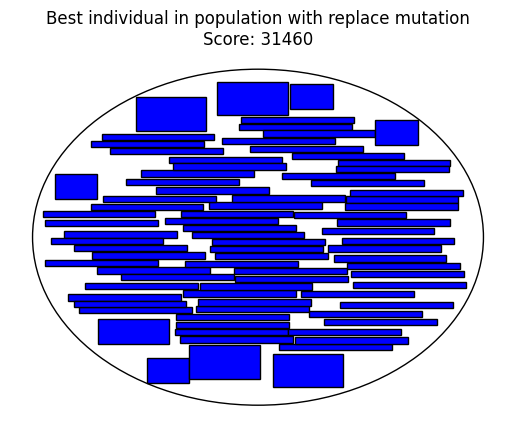

In [104]:
pop_move = load_population("800_replace", 2)
pop_move.best_individual().plot()

plt.title("Best individual in population with replace mutation\nScore: " + str(pop_move.best_individual().score()))   

plt.savefig("../img/hyperparameters/best_individual_replace.png")

In [105]:
best_scores_cros_00, avg_scores_cross_00, times = load_summary_experiment("800_crossover_00")
best_scores_cros_03, avg_scores_cross_03, times = load_summary_experiment("800_crossover_03")
best_scores_cros_07, avg_scores_cross_07, times = load_summary_experiment("800_10_individuals")
best_scores_cros_10, avg_scores_cross_10, times = load_summary_experiment("800_crossover_10")

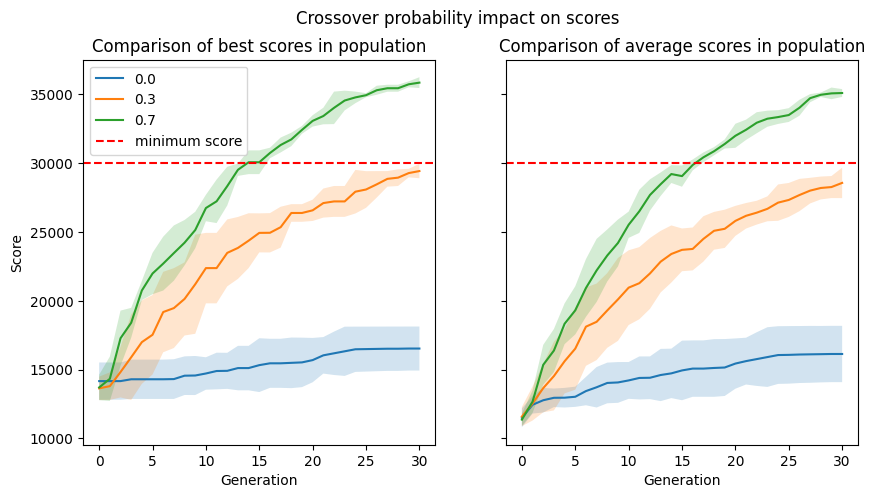

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].plot(best_scores_cros_00.index, best_scores_cros_00.mean(axis=1), label="0.0")
axs[0].plot(best_scores_cros_03.index, best_scores_cros_03.mean(axis=1), label="0.3")
axs[0].plot(best_scores_cros_07.index, best_scores_cros_07.mean(axis=1), label="0.7")

axs[0].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[0].fill_between(best_scores_cros_00.index, y1 = best_scores_cros_00.mean(axis = 1) - best_scores_cros_00.std(axis = 1), y2 = best_scores_cros_00.mean(axis = 1) + best_scores_cros_00.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_cros_03.index, y1 = best_scores_cros_03.mean(axis = 1) - best_scores_cros_03.std(axis = 1), y2 = best_scores_cros_03.mean(axis = 1) + best_scores_cros_03.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_cros_07.index, y1 = best_scores_cros_07.mean(axis = 1) - best_scores_cros_07.std(axis = 1), y2 = best_scores_cros_07.mean(axis = 1) + best_scores_cros_07.std(axis = 1), alpha = 0.2)

axs[0].set_title("Comparison of best scores in population")
axs[0].set_xlabel("Generation")
axs[0].set_ylabel("Score")

axs[1].plot(avg_scores_cross_00.index, avg_scores_cross_00.mean(axis=1), label="0.0")
axs[1].plot(avg_scores_cross_03.index, avg_scores_cross_03.mean(axis=1), label="0.3")
axs[1].plot(avg_scores_cross_07.index, avg_scores_cross_07.mean(axis=1), label="0.7")

axs[1].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[1].fill_between(avg_scores_cross_00.index, y1 = avg_scores_cross_00.mean(axis = 1) - avg_scores_cross_00.std(axis = 1), y2 = avg_scores_cross_00.mean(axis = 1) + avg_scores_cross_00.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_cross_03.index, y1 = avg_scores_cross_03.mean(axis = 1) - avg_scores_cross_03.std(axis = 1), y2 = avg_scores_cross_03.mean(axis = 1) + avg_scores_cross_03.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_cross_07.index, y1 = avg_scores_cross_07.mean(axis = 1) - avg_scores_cross_07.std(axis = 1), y2 = avg_scores_cross_07.mean(axis = 1) + avg_scores_cross_07.std(axis = 1), alpha = 0.2)

axs[1].set_title("Comparison of average scores in population")
axs[1].set_xlabel("Generation")

axs[0].legend()

fig.suptitle("Crossover probability impact on scores")

fig.savefig("../img/hyperparameters/crossover.png")

In [125]:
# generate table of best and average scores in latex

print("Crossover probability & średni wynik & najlepszy wynik \\\\\\hline")
print("0.0 & " + "{:.0f}".format(avg_scores_cross_00.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_cross_00.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_cros_00.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_cros_00.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.3 & " + "{:.0f}".format(avg_scores_cross_03.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_cross_03.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_cros_03.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_cros_03.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.7 & " + "{:.0f}".format(avg_scores_cross_07.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_cross_07.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_cros_07.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_cros_07.std(axis=1).iloc[-1]) + " \\\\ \\hline")

Crossover probability & średni wynik & najlepszy wynik \\\hline
0.0 & 16137±2046 & 16533±1600 \\ \hline
0.3 & 28573±1107 & 29433±522 \\ \hline
0.7 & 35105±285 & 35860±393 \\ \hline


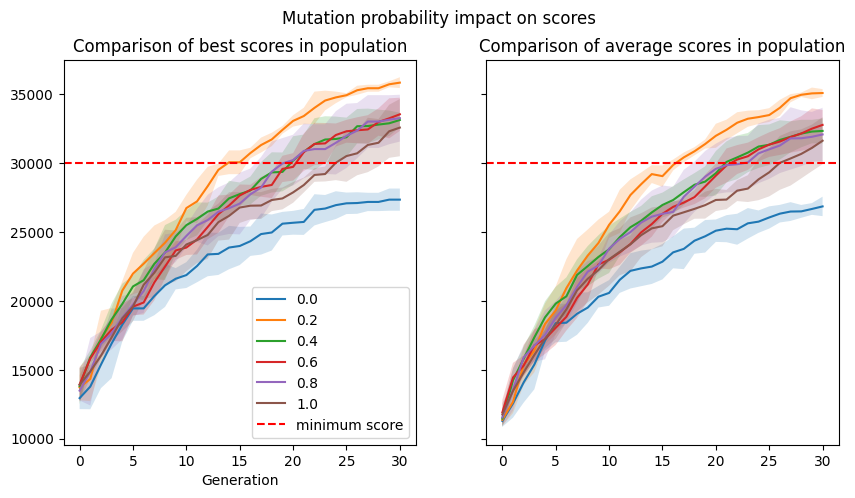

In [136]:
best_scores_mut_00, avg_scores_mut_00, times = load_summary_experiment("800_mutate_00")
best_scores_mut_02, avg_scores_mut_02, times = load_summary_experiment("800_10_individuals")
best_scores_mut_04, avg_scores_mut_04, times = load_summary_experiment("800_mutate_04")
best_scores_mut_06, avg_scores_mut_06, times = load_summary_experiment("800_mutate_06")
best_scores_mut_08, avg_scores_mut_08, times = load_summary_experiment("800_mutate_08")
best_scores_mut_10, avg_scores_mut_10, times = load_summary_experiment("800_mutate_10")


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].plot(best_scores_mut_00.index, best_scores_mut_00.mean(axis=1), label="0.0")
axs[0].plot(best_scores_mut_02.index, best_scores_mut_02.mean(axis=1), label="0.2")
axs[0].plot(best_scores_mut_04.index, best_scores_mut_04.mean(axis=1), label="0.4")
axs[0].plot(best_scores_mut_06.index, best_scores_mut_06.mean(axis=1), label="0.6")
axs[0].plot(best_scores_mut_08.index, best_scores_mut_08.mean(axis=1), label="0.8")
axs[0].plot(best_scores_mut_10.index, best_scores_mut_10.mean(axis=1), label="1.0")

axs[0].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[0].fill_between(best_scores_mut_00.index, y1 = best_scores_mut_00.mean(axis = 1) - best_scores_mut_00.std(axis = 1), y2 = best_scores_mut_00.mean(axis = 1) + best_scores_mut_00.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_mut_02.index, y1 = best_scores_mut_02.mean(axis = 1) - best_scores_mut_02.std(axis = 1), y2 = best_scores_mut_02.mean(axis = 1) + best_scores_mut_02.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_mut_04.index, y1 = best_scores_mut_04.mean(axis = 1) - best_scores_mut_04.std(axis = 1), y2 = best_scores_mut_04.mean(axis = 1) + best_scores_mut_04.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_mut_06.index, y1 = best_scores_mut_06.mean(axis = 1) - best_scores_mut_06.std(axis = 1), y2 = best_scores_mut_06.mean(axis = 1) + best_scores_mut_06.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_mut_08.index, y1 = best_scores_mut_08.mean(axis = 1) - best_scores_mut_08.std(axis = 1), y2 = best_scores_mut_08.mean(axis = 1) + best_scores_mut_08.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_mut_10.index, y1 = best_scores_mut_10.mean(axis = 1) - best_scores_mut_10.std(axis = 1), y2 = best_scores_mut_10.mean(axis = 1) + best_scores_mut_10.std(axis = 1), alpha = 0.2)


axs[0].set_title("Comparison of best scores in population")
axs[0].set_xlabel("Generation")

axs[1].plot(avg_scores_mut_00.index, avg_scores_mut_00.mean(axis=1), label="0.0")
axs[1].plot(avg_scores_mut_02.index, avg_scores_mut_02.mean(axis=1), label="0.2")
axs[1].plot(avg_scores_mut_04.index, avg_scores_mut_04.mean(axis=1), label="0.4")
axs[1].plot(avg_scores_mut_06.index, avg_scores_mut_06.mean(axis=1), label="0.6")
axs[1].plot(avg_scores_mut_08.index, avg_scores_mut_08.mean(axis=1), label="0.8")
axs[1].plot(avg_scores_mut_10.index, avg_scores_mut_10.mean(axis=1), label="1.0")

axs[1].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[1].fill_between(avg_scores_mut_00.index, y1 = avg_scores_mut_00.mean(axis = 1) - avg_scores_mut_00.std(axis = 1), y2 = avg_scores_mut_00.mean(axis = 1) + avg_scores_mut_00.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_mut_02.index, y1 = avg_scores_mut_02.mean(axis = 1) - avg_scores_mut_02.std(axis = 1), y2 = avg_scores_mut_02.mean(axis = 1) + avg_scores_mut_02.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_mut_04.index, y1 = avg_scores_mut_04.mean(axis = 1) - avg_scores_mut_04.std(axis = 1), y2 = avg_scores_mut_04.mean(axis = 1) + avg_scores_mut_04.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_mut_06.index, y1 = avg_scores_mut_06.mean(axis = 1) - avg_scores_mut_06.std(axis = 1), y2 = avg_scores_mut_06.mean(axis = 1) + avg_scores_mut_06.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_mut_08.index, y1 = avg_scores_mut_08.mean(axis = 1) - avg_scores_mut_08.std(axis = 1), y2 = avg_scores_mut_08.mean(axis = 1) + avg_scores_mut_08.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_mut_10.index, y1 = avg_scores_mut_10.mean(axis = 1) - avg_scores_mut_10.std(axis = 1), y2 = avg_scores_mut_10.mean(axis = 1) + avg_scores_mut_10.std(axis = 1), alpha = 0.2)

axs[1].set_title("Comparison of average scores in population")

axs[0].legend()
fig.suptitle("Mutation probability impact on scores")

fig.savefig("../img/hyperparameters/mutation.png")


In [137]:
print("prawdopodobieństwo mutacji & średni wynik & najlepszy wynik \\\\\\hline")
print("0.0 & " + "{:.0f}".format(avg_scores_mut_00.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_00.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_00.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_00.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.2 & " + "{:.0f}".format(avg_scores_mut_02.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_02.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_02.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_02.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.4 & " + "{:.0f}".format(avg_scores_mut_04.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_04.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_04.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_04.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.6 & " + "{:.0f}".format(avg_scores_mut_06.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_06.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_06.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_06.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("0.8 & " + "{:.0f}".format(avg_scores_mut_08.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_08.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_08.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_08.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("1.0 & " + "{:.0f}".format(avg_scores_mut_10.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_mut_10.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_mut_10.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_mut_10.std(axis=1).iloc[-1]) + " \\\\ \\hline")


prawdopodobieństwo mutacji & średni wynik & najlepszy wynik \\\hline
0.0 & 26868±708 & 27360±806 \\ \hline
0.2 & 35105±285 & 35860±393 \\ \hline
0.4 & 32353±908 & 33147±526 \\ \hline
0.6 & 32790±1089 & 33560±1207 \\ \hline
0.8 & 32096±1943 & 33280±1702 \\ \hline
1.0 & 31641±1707 & 32593±2080 \\ \hline


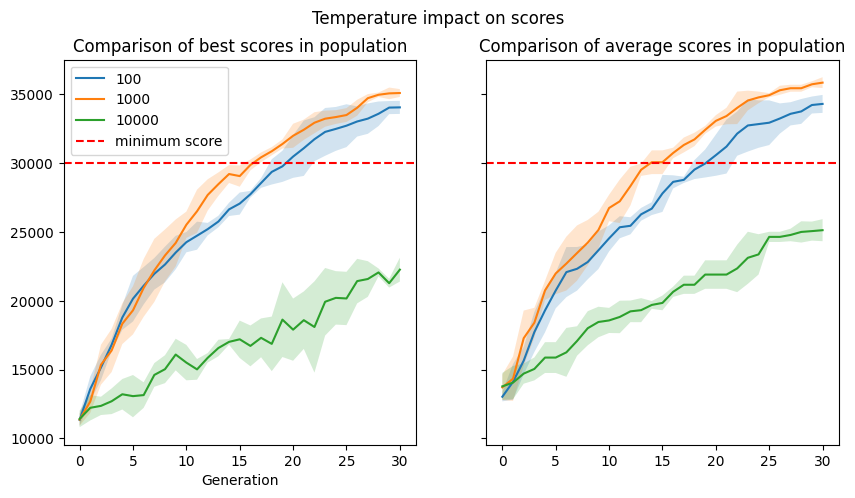

In [138]:
avg_scores_temp_100, best_scores_temp_100, times = load_summary_experiment("800_temp_100")
avg_scores_temp_1000, best_scores_temp_1000, times = load_summary_experiment("800_10_individuals")
avg_scores_temp_10000, best_scores_temp_10000, times = load_summary_experiment("800_temp_10000")


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axs[0].plot(best_scores_temp_100.index, best_scores_temp_100.mean(axis=1), label="100")
axs[0].plot(best_scores_temp_1000.index, best_scores_temp_1000.mean(axis=1), label="1000")
axs[0].plot(best_scores_temp_10000.index, best_scores_temp_10000.mean(axis=1), label="10000")

axs[0].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[0].fill_between(best_scores_temp_100.index, y1 = best_scores_temp_100.mean(axis = 1) - best_scores_temp_100.std(axis = 1), y2 = best_scores_temp_100.mean(axis = 1) + best_scores_temp_100.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_temp_1000.index, y1 = best_scores_temp_1000.mean(axis = 1) - best_scores_temp_1000.std(axis = 1), y2 = best_scores_temp_1000.mean(axis = 1) + best_scores_temp_1000.std(axis = 1), alpha = 0.2)
axs[0].fill_between(best_scores_temp_10000.index, y1 = best_scores_temp_10000.mean(axis = 1) - best_scores_temp_10000.std(axis = 1), y2 = best_scores_temp_10000.mean(axis = 1) + best_scores_temp_10000.std(axis = 1), alpha = 0.2)

axs[0].set_title("Comparison of best scores in population")
axs[0].set_xlabel("Generation")

axs[1].plot(avg_scores_temp_100.index, avg_scores_temp_100.mean(axis=1), label="100")
axs[1].plot(avg_scores_temp_1000.index, avg_scores_temp_1000.mean(axis=1), label="1000")
axs[1].plot(avg_scores_temp_10000.index, avg_scores_temp_10000.mean(axis=1), label="10000")

axs[1].axhline(y=30000, c="red", linestyle = "--", label = "minimum score")

axs[1].fill_between(avg_scores_temp_100.index, y1 = avg_scores_temp_100.mean(axis = 1) - avg_scores_temp_100.std(axis = 1), y2 = avg_scores_temp_100.mean(axis = 1) + avg_scores_temp_100.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_temp_1000.index, y1 = avg_scores_temp_1000.mean(axis = 1) - avg_scores_temp_1000.std(axis = 1), y2 = avg_scores_temp_1000.mean(axis = 1) + avg_scores_temp_1000.std(axis = 1), alpha = 0.2)
axs[1].fill_between(avg_scores_temp_10000.index, y1 = avg_scores_temp_10000.mean(axis = 1) - avg_scores_temp_10000.std(axis = 1), y2 = avg_scores_temp_10000.mean(axis = 1) + avg_scores_temp_10000.std(axis = 1), alpha = 0.2)

axs[1].set_title("Comparison of average scores in population")

axs[0].legend()
fig.suptitle("Temperature impact on scores")

fig.savefig("../img/hyperparameters/temperature.png")

In [139]:
print("temperatura & średni wynik & najlepszy wynik \\\\\\hline")
print("100 & " + "{:.0f}".format(avg_scores_temp_100.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_temp_100.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_temp_100.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_temp_100.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("1000 & " + "{:.0f}".format(avg_scores_temp_1000.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_temp_1000.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_temp_1000.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_temp_1000.std(axis=1).iloc[-1]) + " \\\\ \\hline")
print("10000 & " + "{:.0f}".format(avg_scores_temp_10000.mean(axis=1).iloc[-1]) + "±" + "{:.0f}".format(avg_scores_temp_10000.std(axis=1).iloc[-1]) + " & " + "{:.0f}".format(best_scores_temp_10000.mean(axis=1).iloc[-1])+"±" + "{:.0f}".format(best_scores_temp_10000.std(axis=1).iloc[-1]) + " \\\\ \\hline")

temperatura & średni wynik & najlepszy wynik \\\hline
100 & 34313±653 & 34061±475 \\ \hline
1000 & 35860±393 & 35105±285 \\ \hline
10000 & 25133±802 & 22265±868 \\ \hline
